In [1]:
#Web Scraping and Text Summarization using NLTK

In [2]:
#Import all required libraries 
import bs4 as bs  # BeautifulSoup
import urllib.request
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from heapq import nlargest


In [3]:
#Use the web scraping technique with BeautifulSoup to get the
#text data from the specified data location on the Wikipedia webpage.


In [4]:
!python -m pip install -U gensim

/System/Library/Frameworks/Python.framework/Versions/2.7/Resources/Python.app/Contents/MacOS/Python: No module named pip


In [5]:
def webpage_scraping(url): 
    scrapedata = urllib.request.urlopen(url)
    #Reading data from input url 
    textdata = scrapedata.read()
    #Parsing data and locating and identifying paragraphs
    parseddata = bs.BeautifulSoup(textdata,'lxml')
    paragraphs = parseddata.find_all('p')
    processedtext = ""
    for para in paragraphs:
        processedtext += para.text
    #Returning the scraped text
    return processedtext



In [6]:
scrapetext = webpage_scraping('https://en.wikipedia.org/wiki/Natural_language_processing')  
print(scrapetext)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.
Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.
Natural language processing has its roots in the 1950s. Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.
The premise of symbolic NLP is well-summarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and mat

In [7]:
#Process the text data and must include:
#2.1 Tokenize the words

In [8]:
#Tokenizing the text
wordtokens = word_tokenize(scrapetext)
print("The number of words after word tokenizing: ", len(wordtokens))
#Print tokenized set of words
print(wordtokens)


The number of words after word tokenizing:  1492
['Natural', 'language', 'processing', '(', 'NLP', ')', 'is', 'a', 'subfield', 'of', 'linguistics', ',', 'computer', 'science', ',', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', ',', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', '.', 'Challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', ',', 'natural', 'language', 'understanding', ',', 'and', 'natural-language', 'generation', '.', 'Natural', 'language', 'processing', 'has', 'its', 'roots', 'in', 'the', '1950s', '.', 'Already', 'in', '1950', ',', 'Alan', 'Turing', 'published', 'an', 'article', 'titled', '``', 'Computing', 'Machinery', 'and', 'Intelligence', "''", 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'Turing', 'test', 'as', 'a', 

In [9]:
#2.2 Remove the stop words, punctuation, and digit numbers.

In [10]:
#Removing punctuation
tokenizer = RegexpTokenizer(r'\w+')
punctuationtokens = tokenizer.tokenize(scrapetext.lower())
print("The number of words after word tokenizing and removing punctuation: ", len(punctuationtokens))
#Print words after removing punctuation
print(punctuationtokens)

#Removing stopwords
stopwordtokens = [token for token in punctuationtokens if token not in stopwords.words('english')]
print("The number of words without stop words: ", len(stopwordtokens))
#Print words after removing stopwords
print(stopwordtokens)

#Removing digit numbers 
digittokens = [token for token in stopwordtokens if token in re.sub(r'\d+','', token)]
print("The number of words without digits: ", len(digittokens))
#Print words after removing digits
print(digittokens)



The number of words after word tokenizing and removing punctuation:  1320
['natural', 'language', 'processing', 'nlp', 'is', 'a', 'subfield', 'of', 'linguistics', 'computer', 'science', 'and', 'artificial', 'intelligence', 'concerned', 'with', 'the', 'interactions', 'between', 'computers', 'and', 'human', 'language', 'in', 'particular', 'how', 'to', 'program', 'computers', 'to', 'process', 'and', 'analyze', 'large', 'amounts', 'of', 'natural', 'language', 'data', 'challenges', 'in', 'natural', 'language', 'processing', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understanding', 'and', 'natural', 'language', 'generation', 'natural', 'language', 'processing', 'has', 'its', 'roots', 'in', 'the', '1950s', 'already', 'in', '1950', 'alan', 'turing', 'published', 'an', 'article', 'titled', 'computing', 'machinery', 'and', 'intelligence', 'which', 'proposed', 'what', 'is', 'now', 'called', 'the', 'turing', 'test', 'as', 'a', 'criterion', 'of', 'intelligence', 'a',

In [11]:
#2.3 Write a function to lemmatize the words


In [12]:
# Initialise the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()
#Lemmatize each word
lemmatizedtokens = [lemmatizer.lemmatize(token, pos="v") for token in digittokens]
#Print lemmatized set of words
print(lemmatizedtokens)


['natural', 'language', 'process', 'nlp', 'subfield', 'linguistics', 'computer', 'science', 'artificial', 'intelligence', 'concern', 'interactions', 'computers', 'human', 'language', 'particular', 'program', 'computers', 'process', 'analyze', 'large', 'amount', 'natural', 'language', 'data', 'challenge', 'natural', 'language', 'process', 'frequently', 'involve', 'speech', 'recognition', 'natural', 'language', 'understand', 'natural', 'language', 'generation', 'natural', 'language', 'process', 'root', 'already', 'alan', 'turing', 'publish', 'article', 'title', 'compute', 'machinery', 'intelligence', 'propose', 'call', 'turing', 'test', 'criterion', 'intelligence', 'task', 'involve', 'automate', 'interpretation', 'generation', 'natural', 'language', 'time', 'articulate', 'problem', 'separate', 'artificial', 'intelligence', 'premise', 'symbolic', 'nlp', 'well', 'summarize', 'john', 'searle', 'chinese', 'room', 'experiment', 'give', 'collection', 'rule', 'e', 'g', 'chinese', 'phrasebook', 

In [13]:
#2.4 Calculate the word distribution using FreqDist

<FreqDist with 382 samples and 779 outcomes>


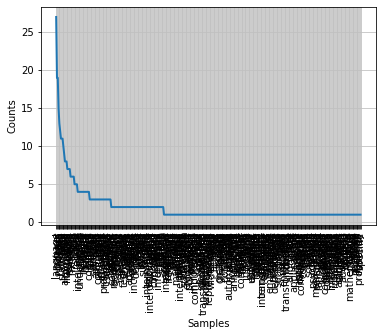

In [14]:
#Calculate word distribution/frequency of words and plot the graph
freqdist = nltk.FreqDist(lemmatizedtokens)
print(freqdist)
freqdist.plot()

In [15]:
#2.5 List and plot the top 15 words


[('language', 27), ('natural', 19), ('process', 19), ('learn', 15), ('machine', 13), ('task', 12), ('nlp', 11), ('use', 11), ('statistical', 11), ('model', 10), ('rule', 9), ('base', 8), ('algorithms', 8), ('cognitive', 8), ('linguistics', 7)]


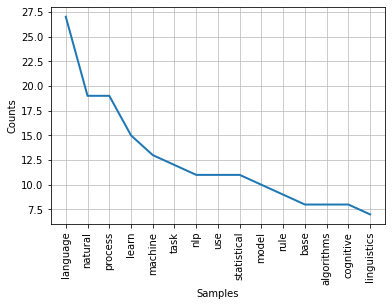

language: 27
natural: 19
process: 19
learn: 15
machine: 13
task: 12
nlp: 11
use: 11
statistical: 11
model: 10
rule: 9
base: 8
algorithms: 8
cognitive: 8
linguistics: 7


In [16]:
#Calculate ad plot freuencies for top 15 elements
k = 15
print(freqdist.most_common(k))
freqdist.plot(k)

#Outputting the top 15 words
for word, frequency in freqdist.most_common(k):
    print(u'{}: {}'.format(word, frequency))

In [17]:
#3. Summarize the text as shown in class:
#3.1 Calculate word Weighted frequency
#Please specify the math formula

In [18]:
#Create a dictionary
wordweights = {}
#if a word is introduced for the first time wordfreq will be set to 1, else it will increment by 1  
for token in lemmatizedtokens:
        if token not in wordweights.keys():
            wordweights[token] = 1
        else:
            wordweights[token] += 1
            
#Calculate frequency of word that occurs most
highfreqword = max(wordweights.values())

#Calculate word weighted frequency for each word by dividing with the highest obtained frequency
for token in wordweights.keys():
    wordweights[token] = wordweights[token]/highfreqword

#Print word weighted frequencies
print(wordweights)

{'natural': 0.7037037037037037, 'language': 1.0, 'process': 0.7037037037037037, 'nlp': 0.4074074074074074, 'subfield': 0.037037037037037035, 'linguistics': 0.25925925925925924, 'computer': 0.1111111111111111, 'science': 0.1111111111111111, 'artificial': 0.07407407407407407, 'intelligence': 0.14814814814814814, 'concern': 0.037037037037037035, 'interactions': 0.037037037037037035, 'computers': 0.07407407407407407, 'human': 0.07407407407407407, 'particular': 0.037037037037037035, 'program': 0.037037037037037035, 'analyze': 0.1111111111111111, 'large': 0.14814814814814814, 'amount': 0.037037037037037035, 'data': 0.18518518518518517, 'challenge': 0.037037037037037035, 'frequently': 0.037037037037037035, 'involve': 0.07407407407407407, 'speech': 0.14814814814814814, 'recognition': 0.07407407407407407, 'understand': 0.14814814814814814, 'generation': 0.07407407407407407, 'root': 0.037037037037037035, 'already': 0.037037037037037035, 'alan': 0.037037037037037035, 'turing': 0.07407407407407407

In [19]:
#3.2 Score the sentences

In [20]:
#Preprocessing original text to remove digits while keeping sentences intact.
removenumbers = re.sub(r'\[[0-9]*\]', ' ', scrapetext)
removespaces = re.sub(r'\s+', ' ', removenumbers)
sentencelist = nltk.sent_tokenize(removespaces)
#Create a dictionary
sentencescores = {}
#Summing the normalised values of words present in each sentence
for sent in sentencelist:
    for token in nltk.word_tokenize(sent.lower()):
        if token in wordweights.keys():
                if sent not in sentencescores.keys():
                    sentencescores[sent] = wordweights[token.lower()]
                else:
                    sentencescores[sent] += wordweights[token.lower()]
#print the sentence score
print(sentencescores)


{'Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data.': 7.037037037037036, 'Challenges in natural language processing frequently involve speech recognition, natural language understanding, and natural-language generation.': 3.814814814814815, 'Natural language processing has its roots in the 1950s.': 1.7037037037037037, 'Already in 1950, Alan Turing published an article titled "Computing Machinery and Intelligence" which proposed what is now called the Turing test as a criterion of intelligence, a task that involves the automated interpretation and generation of natural language, but at the time not articulated as a problem separate from artificial intelligence.': 3.2962962962962967, "The premise of symbolic NLP is well-summarized by John Searle's Chinese room

In [21]:
#3.3 : Build a summary (based on ratio, sentence or word count, etc.)


In [22]:
#Select 30% of total sentences (=12 sentences)
selectedsentences = int(len(sentencelist)*0.3)
#Fetch 12 top sentences with maximum scores (library used nheapq)
summary = nlargest(selectedsentences, sentencescores, key = sentencescores.get)
#combine sentences
summarylist= [token for token in summary]
summary = ' '.join(summarylist)
#Print summary
print(summary)

Natural language processing (NLP) is a subfield of linguistics, computer science, and artificial intelligence concerned with the interactions between computers and human language, in particular how to program computers to process and analyze large amounts of natural language data. In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others. George Lakoff offers a methodology to build Natural language processing (NLP) algorithms through the perspective of Cognitive science, along with the findings of Cognitive linguistics: The first defining aspect of this cognitive task of NLP is the application of the theory of Conceptual metaphor, explained by Lakoff as “the understanding of one idea, in terms of another” which pr

In [23]:
#4. Summarize the same text data using Gensim with TextRank

In [24]:
#!python -m pip install -U gensim

In [25]:
#import the library
from gensim.summarization import summarize
#Print text Summarization using Gensim Textrank
print (summarize(removespaces))
summarize(removespaces)

The premise of symbolic NLP is well-summarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other NLP tasks) by applying those rules to the data it is confronted with.
In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others.
More recent systems based on machine-learning algorithms have many advantages over hand-produced rules: Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used Since the so-called "statistical revolution" in the late 1980s and mid-1990s, much natural language processing research has relied heav

'The premise of symbolic NLP is well-summarized by John Searle\'s Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other NLP tasks) by applying those rules to the data it is confronted with.\nIn the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others.\nMore recent systems based on machine-learning algorithms have many advantages over hand-produced rules: Despite the popularity of machine learning in NLP research, symbolic methods are still (2020) commonly used Since the so-called "statistical revolution" in the late 1980s and mid-1990s, much natural language processing research has relied 

In [26]:
#print 10% proportion of the number of sentences of the original text to be chosen for the summary.
summarize(removespaces, ratio=0.30, split=True)

["The premise of symbolic NLP is well-summarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other NLP tasks) by applying those rules to the data it is confronted with.",
 'In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others.',
 'In the early days, many language-processing systems were designed by symbolic methods, i.e., the hand-coding of a set of rules, coupled with a dictionary lookup: such as by writing grammars or devising heuristic rules for stemming.',
 'More recent systems based on machine-learning algorithms have many advantages over hand-produced rule

In [27]:
#print the output which contains only 500 words
summarize(removespaces, word_count=500, split=True)

["The premise of symbolic NLP is well-summarized by John Searle's Chinese room experiment: Given a collection of rules (e.g., a Chinese phrasebook, with questions and matching answers), the computer emulates natural language understanding (or other NLP tasks) by applying those rules to the data it is confronted with.",
 'In the 2010s, representation learning and deep neural network-style machine learning methods became widespread in natural language processing, due in part to a flurry of results showing that such techniques can achieve state-of-the-art results in many natural language tasks, for example in language modeling, parsing, and many others.',
 'In the early days, many language-processing systems were designed by symbolic methods, i.e., the hand-coding of a set of rules, coupled with a dictionary lookup: such as by writing grammars or devising heuristic rules for stemming.',
 'More recent systems based on machine-learning algorithms have many advantages over hand-produced rule

In [28]:
#print important keywords
from gensim.summarization import keywords
keywords(removespaces, split=True)

['learn',
 'statistical',
 'large',
 'largely',
 'machine learning',
 'rules',
 'cognition',
 'cognitive',
 'task',
 'tasks',
 'natural language processing',
 'real',
 'based',
 'computers',
 'computing',
 'computational',
 'process',
 'processes',
 'nlp',
 'experiment',
 'experience',
 'systems',
 'turing',
 'results',
 'features',
 'feature',
 'research',
 'researched',
 'data',
 'answers',
 'answering',
 'grammar',
 'grammars',
 'word',
 'words',
 'neural',
 'big',
 'linguistics',
 'hand',
 'input',
 'relative',
 'paradigm',
 'translation',
 'modeling',
 'models',
 'model',
 'possibly',
 'possible',
 'producing',
 'produced',
 'produce',
 'semantic',
 'information',
 'metaphor',
 'somewhat',
 'multiple',
 'underpinnings',
 'intelligence',
 'defining',
 'substantial',
 'transformational',
 'transformations',
 'intermediate',
 'probabilistic',
 'interdisciplinary scientific']

In [29]:

#Comparison of Gensim and NLTK Summarization

#Text Summarization using NLTK only splits text by sentences without analyzing the semantic structure. It takes 
#a long time to generate summaries and does not produce as coherent sentences as Gensim. It is also very complicated 
#to use.
#Gensim is designed for unsupervised text modeling generates relatively fluent and coherent sentences and summarises 
#the text effectively in few lines of code. It also has less grammatical errors.
#A method that can be improved is to use abstractive summary techniques. NLTK and Gensim are extractive summary 
#summary techniques. Using abstractive summary techniques can reduce the grammatical inconsistencies of extractive techniques.
#Another method can be used to calculate word weights which the TF-IDF formula that produces robust results. 